# Noise2Void - 3D Example for Parhyale Data

__Note:__ This notebook expects a trained model and will only work if you have executed the `01_training.ipynb` beforehand.

In [1]:
# We import all our dependencies.
from pathlib import Path
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from csbdeep.io import save_tiff_imagej_compatible

2024-09-05 00:48:43.241101: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-09-05 00:48:43.241130: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load the Network

In [2]:
# A previously trained model is loaded by creating a new N2V-object without providing a 'config'.
model_name = 'n2v_3D_movie1-16'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


2024-09-05 00:49:00.325592: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-09-05 00:49:00.326347: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-09-05 00:49:00.327020: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-09-05 00:49:00.327576: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2024-09-05 00:49:00.328136: W tensorflow/stream_executor/platform/default/dso_loader.cc:64

In [3]:
# In case you do not want to load the weights that lead to lowest validation loss during 
# training but the latest computed weights, you can execute the following line:

# model.load_weights('weights_last.h5')

## Prediction
Here we will simply use the same data as during training and denoise it using our network.

In [4]:
datadir = 'data/standard'
preddir = datadir + '_n2v_200epoch'
Path(preddir).mkdir(exist_ok=True)
img = imread(f'{datadir}/standard.tif')
preds = []
for t in range(img.shape[0]):
    pred = model.predict(img[t], axes='ZYX', n_tiles=(2,4,4))
    pred -= pred.min()
    pred = (pred / pred.max() * 255).astype(np.uint8)
    preds.append(pred)
result = np.array(preds)
save_tiff_imagej_compatible(f'{preddir}/standard_n2v_200epoch.tif', result, 'TZYX')

The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 0s 343ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 85598.04it/s]

1/1 [==============================] - 0s 126ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.07it/s]

1/1 [==============================] - 0s 127ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.07it/s]

1/1 [==============================] - 0s 127ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.23it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.58it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  6.07it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:01<00:01,  6.25it/s]

1/1 [==============================] - 0s 125ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.37it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.42it/s]

1/1 [==============================] - 0s 123ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.50it/s]

1/1 [==============================] - 0s 119ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.58it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.58it/s]

1/1 [==============================] - 0s 122ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.61it/s]

1/1 [==============================] - 0s 129ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:02<00:00,  6.58it/s]

1/1 [==============================] - 0s 125ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.59it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  6.76it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 114ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 95325.09it/s]

1/1 [==============================] - 0s 121ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.55it/s]

1/1 [==============================] - 0s 119ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.55it/s]

1/1 [==============================] - 0s 123ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.67it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.96it/s]

1/1 [==============================] - 0s 124ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.55it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.29it/s]

1/1 [==============================] - 0s 121ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.12it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.93it/s]

1/1 [==============================] - 0s 123ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.83it/s]

1/1 [==============================] - 0s 124ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 121ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 125ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.72it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.69it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.16it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 120ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 87381.33it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.47it/s]

1/1 [==============================] - 0s 119ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.47it/s]

1/1 [==============================] - 0s 122ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.50it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.86it/s]

1/1 [==============================] - 0s 124ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.43it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.25it/s]

1/1 [==============================] - 0s 124ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.08it/s]

1/1 [==============================] - 0s 124ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.95it/s]

1/1 [==============================] - 0s 123ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.92it/s]

1/1 [==============================] - 0s 123ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.82it/s]

1/1 [==============================] - 0s 127ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.72it/s]

1/1 [==============================] - 0s 121ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.68it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.72it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.69it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.14it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 125ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 80659.69it/s]

1/1 [==============================] - 0s 124ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.40it/s]

1/1 [==============================] - 0s 123ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.40it/s]

1/1 [==============================] - 0s 125ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.33it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.78it/s]

1/1 [==============================] - 0s 122ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.35it/s]

1/1 [==============================] - 0s 129ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.06it/s]

1/1 [==============================] - 0s 125ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.93it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.83it/s]

1/1 [==============================] - 0s 125ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.78it/s]

1/1 [==============================] - 0s 123ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.73it/s]

1/1 [==============================] - 0s 115ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.87it/s]

1/1 [==============================] - 0s 122ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 125ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.69it/s]

1/1 [==============================] - 0s 123ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.71it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.08it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 120ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 97541.95it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.52it/s]

1/1 [==============================] - 0s 122ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.52it/s]

1/1 [==============================] - 0s 125ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.45it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.84it/s]

1/1 [==============================] - 0s 124ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.45it/s]

1/1 [==============================] - 0s 121ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.23it/s]

1/1 [==============================] - 0s 121ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.08it/s]

1/1 [==============================] - 0s 126ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.84it/s]

1/1 [==============================] - 0s 125ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.76it/s]

1/1 [==============================] - 0s 122ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 116ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.84it/s]

1/1 [==============================] - 0s 119ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.83it/s]

1/1 [==============================] - 0s 121ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.83it/s]

1/1 [==============================] - 0s 113ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.19it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 124ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 95325.09it/s]

1/1 [==============================] - 0s 122ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.80it/s]

1/1 [==============================] - 0s 124ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.80it/s]

1/1 [==============================] - 0s 117ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.54it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.88it/s]

1/1 [==============================] - 0s 121ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.53it/s]

1/1 [==============================] - 0s 121ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.33it/s]

1/1 [==============================] - 0s 121ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.12it/s]

1/1 [==============================] - 0s 126ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.90it/s]

1/1 [==============================] - 0s 119ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.91it/s]

1/1 [==============================] - 0s 128ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.70it/s]

1/1 [==============================] - 0s 123ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.65it/s]

1/1 [==============================] - 0s 120ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.71it/s]

1/1 [==============================] - 0s 121ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.70it/s]

1/1 [==============================] - 0s 125ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.12it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 132ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 87381.33it/s]

1/1 [==============================] - 0s 126ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.11it/s]

1/1 [==============================] - 0s 127ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.11it/s]

1/1 [==============================] - 0s 130ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.16it/s]

1/1 [==============================] - 0s 126ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.61it/s]

1/1 [==============================] - 0s 114ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.37it/s]

1/1 [==============================] - 0s 117ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.27it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.08it/s]

1/1 [==============================] - 0s 125ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.91it/s]

1/1 [==============================] - 0s 122ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.83it/s]

1/1 [==============================] - 0s 122ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.83it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 122ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 121ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.77it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.10it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 122ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 99864.38it/s]

1/1 [==============================] - 0s 125ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.40it/s]

1/1 [==============================] - 0s 124ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.40it/s]

1/1 [==============================] - 0s 121ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.53it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.90it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.46it/s]

1/1 [==============================] - 0s 121ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.25it/s]

1/1 [==============================] - 0s 121ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.04it/s]

1/1 [==============================] - 0s 123ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.85it/s]

1/1 [==============================] - 0s 122ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.83it/s]

1/1 [==============================] - 0s 121ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.84it/s]

1/1 [==============================] - 0s 120ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.84it/s]

1/1 [==============================] - 0s 124ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.78it/s]

1/1 [==============================] - 0s 121ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.82it/s]

1/1 [==============================] - 0s 127ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.70it/s]

1/1 [==============================] - 0s 121ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.14it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 127ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 97541.95it/s]

1/1 [==============================] - 0s 124ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.51it/s]

1/1 [==============================] - 0s 124ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.51it/s]

1/1 [==============================] - 0s 124ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.31it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.65it/s]

1/1 [==============================] - 0s 129ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.25it/s]

1/1 [==============================] - 0s 128ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  6.98it/s]

1/1 [==============================] - 0s 123ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.90it/s]

1/1 [==============================] - 0s 124ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.79it/s]

1/1 [==============================] - 0s 123ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 126ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.65it/s]

1/1 [==============================] - 0s 126ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.59it/s]

1/1 [==============================] - 0s 123ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.56it/s]

1/1 [==============================] - 0s 124ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.55it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.57it/s]

1/1 [==============================] - 0s 119ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.00it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 121ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 91180.52it/s]

1/1 [==============================] - 0s 124ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 12.92it/s]

1/1 [==============================] - 0s 123ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:01, 12.92it/s]

1/1 [==============================] - 0s 122ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.43it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.85it/s]

1/1 [==============================] - 0s 121ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.43it/s]

1/1 [==============================] - 0s 121ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.19it/s]

1/1 [==============================] - 0s 121ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.02it/s]

1/1 [==============================] - 0s 123ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.88it/s]

1/1 [==============================] - 0s 121ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.84it/s]

1/1 [==============================] - 0s 123ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.80it/s]

1/1 [==============================] - 0s 121ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 121ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.78it/s]

1/1 [==============================] - 0s 121ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.75it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.13it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 123ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 93206.76it/s]

1/1 [==============================] - 0s 122ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.39it/s]

1/1 [==============================] - 0s 122ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.39it/s]

1/1 [==============================] - 0s 121ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.44it/s]

1/1 [==============================] - 0s 121ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.87it/s]

1/1 [==============================] - 0s 121ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.53it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.31it/s]

1/1 [==============================] - 0s 121ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.13it/s]

1/1 [==============================] - 0s 128ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.85it/s]

1/1 [==============================] - 0s 121ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.84it/s]

1/1 [==============================] - 0s 122ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 122ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 123ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.76it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.76it/s]

1/1 [==============================] - 0s 121ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.80it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.17it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 123ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 97541.95it/s]

1/1 [==============================] - 0s 121ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.60it/s]

1/1 [==============================] - 0s 123ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.60it/s]

1/1 [==============================] - 0s 123ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.36it/s]

1/1 [==============================] - 0s 121ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.81it/s]

1/1 [==============================] - 0s 121ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.50it/s]

1/1 [==============================] - 0s 121ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.27it/s]

1/1 [==============================] - 0s 120ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.14it/s]

1/1 [==============================] - 0s 121ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:00,  7.04it/s]

1/1 [==============================] - 0s 121ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.94it/s]

1/1 [==============================] - 0s 122ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.90it/s]

1/1 [==============================] - 0s 122ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.82it/s]

1/1 [==============================] - 0s 123ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.70it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.73it/s]

1/1 [==============================] - 0s 121ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.75it/s]

1/1 [==============================] - 0s 121ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.17it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 124ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 87381.33it/s]

1/1 [==============================] - 0s 122ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.64it/s]

1/1 [==============================] - 0s 123ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.64it/s]

1/1 [==============================] - 0s 121ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.45it/s]

1/1 [==============================] - 0s 121ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.84it/s]

1/1 [==============================] - 0s 121ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.43it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.22it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.08it/s]

1/1 [==============================] - 0s 121ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.97it/s]

1/1 [==============================] - 0s 121ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.91it/s]

1/1 [==============================] - 0s 122ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.87it/s]

1/1 [==============================] - 0s 121ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.85it/s]

1/1 [==============================] - 0s 120ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.82it/s]

1/1 [==============================] - 0s 124ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.72it/s]

1/1 [==============================] - 0s 121ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.74it/s]

1/1 [==============================] - 0s 125ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.14it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 126ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 89240.51it/s]

1/1 [==============================] - 0s 124ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.03it/s]

1/1 [==============================] - 0s 122ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.03it/s]

1/1 [==============================] - 0s 123ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.37it/s]

1/1 [==============================] - 0s 121ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.82it/s]

1/1 [==============================] - 0s 121ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.47it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.18it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.99it/s]

1/1 [==============================] - 0s 125ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.82it/s]

1/1 [==============================] - 0s 122ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.76it/s]

1/1 [==============================] - 0s 121ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 124ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.71it/s]

1/1 [==============================] - 0s 122ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.70it/s]

1/1 [==============================] - 0s 121ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.71it/s]

1/1 [==============================] - 0s 123ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.65it/s]

1/1 [==============================] - 0s 126ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.06it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 123ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 97541.95it/s]

1/1 [==============================] - 0s 122ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.48it/s]

1/1 [==============================] - 0s 122ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.48it/s]

1/1 [==============================] - 0s 122ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.39it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.76it/s]

1/1 [==============================] - 0s 129ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.25it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.10it/s]

1/1 [==============================] - 0s 124ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.93it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.85it/s]

1/1 [==============================] - 0s 126ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.77it/s]

1/1 [==============================] - 0s 121ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.77it/s]

1/1 [==============================] - 0s 120ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.77it/s]

1/1 [==============================] - 0s 122ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.68it/s]

1/1 [==============================] - 0s 121ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.72it/s]

1/1 [==============================] - 0s 121ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.73it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.08it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 122ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 95325.09it/s]

1/1 [==============================] - 0s 124ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.18it/s]

1/1 [==============================] - 0s 122ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.18it/s]

1/1 [==============================] - 0s 121ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.49it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.84it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.37it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.17it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.04it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.93it/s]

1/1 [==============================] - 0s 122ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.87it/s]

1/1 [==============================] - 0s 121ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 121ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.82it/s]

1/1 [==============================] - 0s 120ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 121ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.83it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.77it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.14it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 121ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 93206.76it/s]

1/1 [==============================] - 0s 122ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.73it/s]

1/1 [==============================] - 0s 123ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.73it/s]

1/1 [==============================] - 0s 124ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.51it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.84it/s]

1/1 [==============================] - 0s 120ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.50it/s]

1/1 [==============================] - 0s 124ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.18it/s]

1/1 [==============================] - 0s 123ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.99it/s]

1/1 [==============================] - 0s 123ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.83it/s]

1/1 [==============================] - 0s 121ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 123ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.77it/s]

1/1 [==============================] - 0s 120ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.78it/s]

1/1 [==============================] - 0s 121ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.76it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 123ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.71it/s]

1/1 [==============================] - 0s 121ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.12it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 121ms/step


  6%|████████▋                                                                                                                                 | 1/16 [00:00<00:00, 116508.44it/s]

1/1 [==============================] - 0s 122ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.61it/s]

1/1 [==============================] - 0s 122ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.61it/s]

1/1 [==============================] - 0s 120ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.45it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.79it/s]

1/1 [==============================] - 0s 122ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.46it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.21it/s]

1/1 [==============================] - 0s 124ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.06it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.96it/s]

1/1 [==============================] - 0s 122ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.85it/s]

1/1 [==============================] - 0s 122ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.80it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.73it/s]

1/1 [==============================] - 0s 122ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.68it/s]

1/1 [==============================] - 0s 120ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.69it/s]

1/1 [==============================] - 0s 121ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.73it/s]

1/1 [==============================] - 0s 123ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.11it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 122ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 85598.04it/s]

1/1 [==============================] - 0s 120ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.53it/s]

1/1 [==============================] - 0s 123ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.53it/s]

1/1 [==============================] - 0s 121ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.54it/s]

1/1 [==============================] - 0s 121ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.95it/s]

1/1 [==============================] - 0s 121ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.45it/s]

1/1 [==============================] - 0s 121ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.23it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.06it/s]

1/1 [==============================] - 0s 120ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.98it/s]

1/1 [==============================] - 0s 120ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.91it/s]

1/1 [==============================] - 0s 122ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.80it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.78it/s]

1/1 [==============================] - 0s 122ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.72it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.72it/s]

1/1 [==============================] - 0s 121ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.71it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.14it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 124ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 95325.09it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.46it/s]

1/1 [==============================] - 0s 122ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.46it/s]

1/1 [==============================] - 0s 123ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.46it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.77it/s]

1/1 [==============================] - 0s 121ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.42it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.22it/s]

1/1 [==============================] - 0s 124ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.02it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.87it/s]

1/1 [==============================] - 0s 124ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.83it/s]

1/1 [==============================] - 0s 124ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 125ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.72it/s]

1/1 [==============================] - 0s 124ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.68it/s]

1/1 [==============================] - 0s 129ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.64it/s]

1/1 [==============================] - 0s 123ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.68it/s]

1/1 [==============================] - 0s 124ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.09it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 125ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 93206.76it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.60it/s]

1/1 [==============================] - 0s 127ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.60it/s]

1/1 [==============================] - 0s 118ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.38it/s]

1/1 [==============================] - 0s 113ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.91it/s]

1/1 [==============================] - 0s 125ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.43it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.16it/s]

1/1 [==============================] - 0s 123ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.04it/s]

1/1 [==============================] - 0s 120ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.97it/s]

1/1 [==============================] - 0s 123ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.89it/s]

1/1 [==============================] - 0s 122ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.85it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 120ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.70it/s]

1/1 [==============================] - 0s 115ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.83it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.82it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.17it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 122ms/step


  6%|████████▋                                                                                                                                 | 1/16 [00:00<00:00, 102300.10it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.26it/s]

1/1 [==============================] - 0s 123ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.26it/s]

1/1 [==============================] - 0s 123ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.41it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.79it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.36it/s]

1/1 [==============================] - 0s 125ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.09it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.00it/s]

1/1 [==============================] - 0s 123ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.88it/s]

1/1 [==============================] - 0s 124ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.86it/s]

1/1 [==============================] - 0s 123ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.78it/s]

1/1 [==============================] - 0s 124ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.76it/s]

1/1 [==============================] - 0s 124ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.72it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.73it/s]

1/1 [==============================] - 0s 123ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.74it/s]

1/1 [==============================] - 0s 121ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.10it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 123ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 91180.52it/s]

1/1 [==============================] - 0s 121ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.73it/s]

1/1 [==============================] - 0s 119ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.73it/s]

1/1 [==============================] - 0s 114ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.89it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  8.08it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.66it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.32it/s]

1/1 [==============================] - 0s 118ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.16it/s]

1/1 [==============================] - 0s 128ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.89it/s]

1/1 [==============================] - 0s 119ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.91it/s]

1/1 [==============================] - 0s 123ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 122ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.76it/s]

1/1 [==============================] - 0s 124ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.72it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 120ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.70it/s]

1/1 [==============================] - 0s 128ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.16it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 125ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 93206.76it/s]

1/1 [==============================] - 0s 125ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.19it/s]

1/1 [==============================] - 0s 129ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.19it/s]

1/1 [==============================] - 0s 125ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.17it/s]

1/1 [==============================] - 0s 125ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.58it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.25it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.09it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.95it/s]

1/1 [==============================] - 0s 121ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.84it/s]

1/1 [==============================] - 0s 122ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 121ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.77it/s]

1/1 [==============================] - 0s 122ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 121ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.71it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.72it/s]

1/1 [==============================] - 0s 123ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.74it/s]

1/1 [==============================] - 0s 121ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.06it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 126ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 87381.33it/s]

1/1 [==============================] - 0s 124ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.53it/s]

1/1 [==============================] - 0s 123ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.53it/s]

1/1 [==============================] - 0s 122ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.49it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.80it/s]

1/1 [==============================] - 0s 122ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.33it/s]

1/1 [==============================] - 0s 125ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.10it/s]

1/1 [==============================] - 0s 120ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.05it/s]

1/1 [==============================] - 0s 124ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.93it/s]

1/1 [==============================] - 0s 123ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.87it/s]

1/1 [==============================] - 0s 122ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.83it/s]

1/1 [==============================] - 0s 114ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.96it/s]

1/1 [==============================] - 0s 110ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  7.01it/s]

1/1 [==============================] - 0s 112ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  7.11it/s]

1/1 [==============================] - 0s 118ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  7.06it/s]

1/1 [==============================] - 0s 124ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.23it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 123ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 93206.76it/s]

1/1 [==============================] - 0s 124ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.40it/s]

1/1 [==============================] - 0s 126ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.40it/s]

1/1 [==============================] - 0s 124ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.32it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.73it/s]

1/1 [==============================] - 0s 124ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.41it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.16it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.06it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.90it/s]

1/1 [==============================] - 0s 126ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 116ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.89it/s]

1/1 [==============================] - 0s 122ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.82it/s]

1/1 [==============================] - 0s 122ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 121ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.76it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.72it/s]

1/1 [==============================] - 0s 120ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.12it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 124ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 95325.09it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.42it/s]

1/1 [==============================] - 0s 123ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.42it/s]

1/1 [==============================] - 0s 122ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.43it/s]

1/1 [==============================] - 0s 128ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.71it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.41it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.22it/s]

1/1 [==============================] - 0s 128ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.00it/s]

1/1 [==============================] - 0s 125ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.82it/s]

1/1 [==============================] - 0s 131ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.64it/s]

1/1 [==============================] - 0s 126ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.63it/s]

1/1 [==============================] - 0s 127ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.63it/s]

1/1 [==============================] - 0s 125ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.55it/s]

1/1 [==============================] - 0s 124ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.56it/s]

1/1 [==============================] - 0s 124ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.56it/s]

1/1 [==============================] - 0s 128ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  6.98it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 124ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 89240.51it/s]

1/1 [==============================] - 0s 127ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.24it/s]

1/1 [==============================] - 0s 127ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.24it/s]

1/1 [==============================] - 0s 124ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.23it/s]

1/1 [==============================] - 0s 127ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.59it/s]

1/1 [==============================] - 0s 127ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.12it/s]

1/1 [==============================] - 0s 125ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  6.93it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.85it/s]

1/1 [==============================] - 0s 130ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.66it/s]

1/1 [==============================] - 0s 122ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.70it/s]

1/1 [==============================] - 0s 111ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.89it/s]

1/1 [==============================] - 0s 110ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.96it/s]

1/1 [==============================] - 0s 111ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  7.03it/s]

1/1 [==============================] - 0s 111ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  7.14it/s]

1/1 [==============================] - 0s 123ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.97it/s]

1/1 [==============================] - 0s 125ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.12it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 125ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 93206.76it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.44it/s]

1/1 [==============================] - 0s 122ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.44it/s]

1/1 [==============================] - 0s 112ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.65it/s]

1/1 [==============================] - 0s 112ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  8.19it/s]

1/1 [==============================] - 0s 124ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.66it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.39it/s]

1/1 [==============================] - 0s 120ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.22it/s]

1/1 [==============================] - 0s 121ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.99it/s]

1/1 [==============================] - 0s 110ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  7.10it/s]

1/1 [==============================] - 0s 110ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  7.12it/s]

1/1 [==============================] - 0s 113ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  7.16it/s]

1/1 [==============================] - 0s 112ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  7.16it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  7.00it/s]

1/1 [==============================] - 0s 121ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.96it/s]

1/1 [==============================] - 0s 121ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.36it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 124ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 99864.38it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.29it/s]

1/1 [==============================] - 0s 122ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.29it/s]

1/1 [==============================] - 0s 125ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.34it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.72it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.41it/s]

1/1 [==============================] - 0s 124ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.12it/s]

1/1 [==============================] - 0s 123ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.92it/s]

1/1 [==============================] - 0s 124ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.85it/s]

1/1 [==============================] - 0s 124ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.78it/s]

1/1 [==============================] - 0s 121ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.80it/s]

1/1 [==============================] - 0s 122ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 123ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.72it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.73it/s]

1/1 [==============================] - 0s 125ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.70it/s]

1/1 [==============================] - 0s 124ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.09it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 125ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 91180.52it/s]

1/1 [==============================] - 0s 124ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.11it/s]

1/1 [==============================] - 0s 126ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.11it/s]

1/1 [==============================] - 0s 124ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.29it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.74it/s]

1/1 [==============================] - 0s 122ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.38it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.17it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.01it/s]

1/1 [==============================] - 0s 121ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.95it/s]

1/1 [==============================] - 0s 121ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.92it/s]

1/1 [==============================] - 0s 121ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.91it/s]

1/1 [==============================] - 0s 121ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.89it/s]

1/1 [==============================] - 0s 129ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.70it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.68it/s]

1/1 [==============================] - 0s 121ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.74it/s]

1/1 [==============================] - 0s 128ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.10it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 125ms/step


  6%|████████▋                                                                                                                                 | 1/16 [00:00<00:00, 102300.10it/s]

1/1 [==============================] - 0s 126ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.35it/s]

1/1 [==============================] - 0s 124ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.35it/s]

1/1 [==============================] - 0s 125ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.37it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.77it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.43it/s]

1/1 [==============================] - 0s 126ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.17it/s]

1/1 [==============================] - 0s 124ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.97it/s]

1/1 [==============================] - 0s 123ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.81it/s]

1/1 [==============================] - 0s 126ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 124ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.70it/s]

1/1 [==============================] - 0s 124ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.69it/s]

1/1 [==============================] - 0s 123ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.71it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.73it/s]

1/1 [==============================] - 0s 124ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.72it/s]

1/1 [==============================] - 0s 125ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.07it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 123ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 93206.76it/s]

1/1 [==============================] - 0s 122ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.59it/s]

1/1 [==============================] - 0s 130ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.59it/s]

1/1 [==============================] - 0s 124ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.13it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.61it/s]

1/1 [==============================] - 0s 125ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.27it/s]

1/1 [==============================] - 0s 126ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.04it/s]

1/1 [==============================] - 0s 114ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.05it/s]

1/1 [==============================] - 0s 123ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.96it/s]

1/1 [==============================] - 0s 121ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.87it/s]

1/1 [==============================] - 0s 112ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.97it/s]

1/1 [==============================] - 0s 122ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.91it/s]

1/1 [==============================] - 0s 121ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.80it/s]

1/1 [==============================] - 0s 124ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.77it/s]

1/1 [==============================] - 0s 123ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.71it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.11it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 127ms/step


  6%|████████▋                                                                                                                                 | 1/16 [00:00<00:00, 104857.60it/s]

1/1 [==============================] - 0s 126ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.28it/s]

1/1 [==============================] - 0s 113ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.28it/s]

1/1 [==============================] - 0s 125ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.66it/s]

1/1 [==============================] - 0s 111ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  8.12it/s]

1/1 [==============================] - 0s 112ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.72it/s]

1/1 [==============================] - 0s 112ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.55it/s]

1/1 [==============================] - 0s 114ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.44it/s]

1/1 [==============================] - 0s 120ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:00,  7.25it/s]

1/1 [==============================] - 0s 111ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  7.27it/s]

1/1 [==============================] - 0s 128ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.97it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.80it/s]

1/1 [==============================] - 0s 132ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.66it/s]

1/1 [==============================] - 0s 124ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.67it/s]

1/1 [==============================] - 0s 123ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.66it/s]

1/1 [==============================] - 0s 124ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.23it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 123ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 95325.09it/s]

1/1 [==============================] - 0s 124ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.15it/s]

1/1 [==============================] - 0s 122ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.15it/s]

1/1 [==============================] - 0s 125ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.29it/s]

1/1 [==============================] - 0s 127ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.64it/s]

1/1 [==============================] - 0s 122ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.30it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.11it/s]

1/1 [==============================] - 0s 123ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.01it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.84it/s]

1/1 [==============================] - 0s 127ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 124ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.64it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.66it/s]

1/1 [==============================] - 0s 116ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 112ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.84it/s]

1/1 [==============================] - 0s 113ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.89it/s]

1/1 [==============================] - 0s 125ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.10it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 123ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 91180.52it/s]

1/1 [==============================] - 0s 125ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.26it/s]

1/1 [==============================] - 0s 112ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.26it/s]

1/1 [==============================] - 0s 119ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.74it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.92it/s]

1/1 [==============================] - 0s 124ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.46it/s]

1/1 [==============================] - 0s 127ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.11it/s]

1/1 [==============================] - 0s 127ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.90it/s]

1/1 [==============================] - 0s 121ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.84it/s]

1/1 [==============================] - 0s 123ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.82it/s]

1/1 [==============================] - 0s 125ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.78it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 123ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.67it/s]

1/1 [==============================] - 0s 124ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.71it/s]

1/1 [==============================] - 0s 124ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.66it/s]

1/1 [==============================] - 0s 121ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.10it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 121ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 66576.25it/s]

1/1 [==============================] - 0s 122ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.81it/s]

1/1 [==============================] - 0s 121ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.81it/s]

1/1 [==============================] - 0s 125ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.39it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.75it/s]

1/1 [==============================] - 0s 124ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.29it/s]

1/1 [==============================] - 0s 120ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.17it/s]

1/1 [==============================] - 0s 119ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.02it/s]

1/1 [==============================] - 0s 121ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.89it/s]

1/1 [==============================] - 0s 130ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.69it/s]

1/1 [==============================] - 0s 116ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.82it/s]

1/1 [==============================] - 0s 125ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 112ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.86it/s]

1/1 [==============================] - 0s 117ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.86it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.79it/s]

1/1 [==============================] - 0s 121ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.13it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 127ms/step


  6%|████████▋                                                                                                                                 | 1/16 [00:00<00:00, 102300.10it/s]

1/1 [==============================] - 0s 112ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:00, 14.38it/s]

1/1 [==============================] - 0s 112ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 14.38it/s]

1/1 [==============================] - 0s 113ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  9.08it/s]

1/1 [==============================] - 0s 113ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  9.08it/s]

1/1 [==============================] - 0s 113ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  8.13it/s]

1/1 [==============================] - 0s 113ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.89it/s]

1/1 [==============================] - 0s 126ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:00<00:01,  7.51it/s]

1/1 [==============================] - 0s 125ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:00,  7.13it/s]

1/1 [==============================] - 0s 125ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.96it/s]

1/1 [==============================] - 0s 124ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.87it/s]

1/1 [==============================] - 0s 125ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.77it/s]

1/1 [==============================] - 0s 123ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 126ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.66it/s]

1/1 [==============================] - 0s 125ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.68it/s]

1/1 [==============================] - 0s 125ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.25it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 126ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 93206.76it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.59it/s]

1/1 [==============================] - 0s 127ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.59it/s]

1/1 [==============================] - 0s 126ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.27it/s]

1/1 [==============================] - 0s 127ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.60it/s]

1/1 [==============================] - 0s 127ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.21it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.02it/s]

1/1 [==============================] - 0s 124ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.94it/s]

1/1 [==============================] - 0s 121ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.84it/s]

1/1 [==============================] - 0s 127ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.70it/s]

1/1 [==============================] - 0s 127ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.67it/s]

1/1 [==============================] - 0s 126ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.61it/s]

1/1 [==============================] - 0s 125ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.52it/s]

1/1 [==============================] - 0s 124ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.60it/s]

1/1 [==============================] - 0s 124ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.64it/s]

1/1 [==============================] - 0s 128ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  6.97it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 123ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 97541.95it/s]

1/1 [==============================] - 0s 122ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.56it/s]

1/1 [==============================] - 0s 128ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.56it/s]

1/1 [==============================] - 0s 123ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.30it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.67it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.32it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.12it/s]

1/1 [==============================] - 0s 127ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.92it/s]

1/1 [==============================] - 0s 130ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.76it/s]

1/1 [==============================] - 0s 129ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.64it/s]

1/1 [==============================] - 0s 126ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.63it/s]

1/1 [==============================] - 0s 124ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.65it/s]

1/1 [==============================] - 0s 119ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.68it/s]

1/1 [==============================] - 0s 126ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.66it/s]

1/1 [==============================] - 0s 119ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.71it/s]

1/1 [==============================] - 0s 133ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.00it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 128ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 97541.95it/s]

1/1 [==============================] - 0s 124ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.10it/s]

1/1 [==============================] - 0s 126ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.10it/s]

1/1 [==============================] - 0s 121ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.38it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.77it/s]

1/1 [==============================] - 0s 121ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.45it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.23it/s]

1/1 [==============================] - 0s 120ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.10it/s]

1/1 [==============================] - 0s 121ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.90it/s]

1/1 [==============================] - 0s 125ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.78it/s]

1/1 [==============================] - 0s 125ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.73it/s]

1/1 [==============================] - 0s 127ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.69it/s]

1/1 [==============================] - 0s 121ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.68it/s]

1/1 [==============================] - 0s 115ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 124ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.73it/s]

1/1 [==============================] - 0s 123ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.11it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 113ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 89240.51it/s]

1/1 [==============================] - 0s 120ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.85it/s]

1/1 [==============================] - 0s 117ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.85it/s]

1/1 [==============================] - 0s 112ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.74it/s]

1/1 [==============================] - 0s 121ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  8.01it/s]

1/1 [==============================] - 0s 129ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.43it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.24it/s]

1/1 [==============================] - 0s 128ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.01it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.92it/s]

1/1 [==============================] - 0s 124ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 130ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.66it/s]

1/1 [==============================] - 0s 127ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.58it/s]

1/1 [==============================] - 0s 134ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.39it/s]

1/1 [==============================] - 0s 131ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.39it/s]

1/1 [==============================] - 0s 130ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.40it/s]

1/1 [==============================] - 0s 126ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  6.97it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 129ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 79137.81it/s]

1/1 [==============================] - 0s 127ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.16it/s]

1/1 [==============================] - 0s 129ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.16it/s]

1/1 [==============================] - 0s 126ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.27it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.70it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.28it/s]

1/1 [==============================] - 0s 128ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  6.97it/s]

1/1 [==============================] - 0s 123ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.86it/s]

1/1 [==============================] - 0s 123ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.78it/s]

1/1 [==============================] - 0s 124ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 127ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.66it/s]

1/1 [==============================] - 0s 124ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.67it/s]

1/1 [==============================] - 0s 120ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.70it/s]

1/1 [==============================] - 0s 112ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.86it/s]

1/1 [==============================] - 0s 113ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.92it/s]

1/1 [==============================] - 0s 127ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.07it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 124ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 95325.09it/s]

1/1 [==============================] - 0s 121ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.52it/s]

1/1 [==============================] - 0s 124ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.52it/s]

1/1 [==============================] - 0s 124ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.44it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.78it/s]

1/1 [==============================] - 0s 124ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.42it/s]

1/1 [==============================] - 0s 124ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.19it/s]

1/1 [==============================] - 0s 123ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.01it/s]

1/1 [==============================] - 0s 123ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.83it/s]

1/1 [==============================] - 0s 111ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.93it/s]

1/1 [==============================] - 0s 129ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.71it/s]

1/1 [==============================] - 0s 126ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.63it/s]

1/1 [==============================] - 0s 124ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.64it/s]

1/1 [==============================] - 0s 121ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.70it/s]

1/1 [==============================] - 0s 119ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.11it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 124ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 93206.76it/s]

1/1 [==============================] - 0s 125ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.39it/s]

1/1 [==============================] - 0s 124ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.39it/s]

1/1 [==============================] - 0s 124ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  6.42it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  6.52it/s]

1/1 [==============================] - 0s 122ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  6.62it/s]

1/1 [==============================] - 0s 110ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:01<00:01,  6.85it/s]

1/1 [==============================] - 0s 112ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.00it/s]

1/1 [==============================] - 0s 111ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:00,  7.10it/s]

1/1 [==============================] - 0s 121ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  7.03it/s]

1/1 [==============================] - 0s 126ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.85it/s]

1/1 [==============================] - 0s 113ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.97it/s]

1/1 [==============================] - 0s 124ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.84it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:02<00:00,  6.80it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.79it/s]

1/1 [==============================] - 0s 114ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  6.94it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 111ms/step


  6%|████████▋                                                                                                                                 | 1/16 [00:00<00:00, 182361.04it/s]

1/1 [==============================] - 0s 110ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:00, 14.91it/s]

1/1 [==============================] - 0s 120ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 14.91it/s]

1/1 [==============================] - 0s 122ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.74it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  8.74it/s]

1/1 [==============================] - 0s 127ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.62it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.31it/s]

1/1 [==============================] - 0s 121ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.19it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:00,  7.08it/s]

1/1 [==============================] - 0s 121ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.99it/s]

1/1 [==============================] - 0s 123ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.87it/s]

1/1 [==============================] - 0s 121ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.84it/s]

1/1 [==============================] - 0s 122ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.76it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.76it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.77it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.18it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 122ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 93206.76it/s]

1/1 [==============================] - 0s 121ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.42it/s]

1/1 [==============================] - 0s 122ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.42it/s]

1/1 [==============================] - 0s 123ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.40it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.82it/s]

1/1 [==============================] - 0s 122ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.38it/s]

1/1 [==============================] - 0s 129ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.12it/s]

1/1 [==============================] - 0s 113ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.17it/s]

1/1 [==============================] - 0s 114ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:00,  7.16it/s]

1/1 [==============================] - 0s 122ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.99it/s]

1/1 [==============================] - 0s 111ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  7.06it/s]

1/1 [==============================] - 0s 112ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  7.12it/s]

1/1 [==============================] - 0s 120ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.99it/s]

1/1 [==============================] - 0s 131ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.78it/s]

1/1 [==============================] - 0s 123ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.22it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 123ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 72315.59it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.19it/s]

1/1 [==============================] - 0s 122ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.19it/s]

1/1 [==============================] - 0s 124ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.34it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.70it/s]

1/1 [==============================] - 0s 122ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.37it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.12it/s]

1/1 [==============================] - 0s 121ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.01it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.86it/s]

1/1 [==============================] - 0s 121ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.82it/s]

1/1 [==============================] - 0s 120ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.85it/s]

1/1 [==============================] - 0s 122ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 124ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.70it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 116ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.82it/s]

1/1 [==============================] - 0s 112ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.15it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 110ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 95325.09it/s]

1/1 [==============================] - 0s 119ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.77it/s]

1/1 [==============================] - 0s 123ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.77it/s]

1/1 [==============================] - 0s 122ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.55it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.87it/s]

1/1 [==============================] - 0s 124ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.42it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.14it/s]

1/1 [==============================] - 0s 117ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.09it/s]

1/1 [==============================] - 0s 120ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.95it/s]

1/1 [==============================] - 0s 117ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.96it/s]

1/1 [==============================] - 0s 112ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  7.03it/s]

1/1 [==============================] - 0s 119ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.98it/s]

1/1 [==============================] - 0s 117ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.97it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.90it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.81it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.22it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 123ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 93206.76it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.60it/s]

1/1 [==============================] - 0s 122ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.60it/s]

1/1 [==============================] - 0s 123ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.53it/s]

1/1 [==============================] - 0s 121ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.85it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.49it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.20it/s]

1/1 [==============================] - 0s 124ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.04it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.90it/s]

1/1 [==============================] - 0s 123ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 122ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 124ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.71it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.68it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.68it/s]

1/1 [==============================] - 0s 125ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.10it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 124ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 91180.52it/s]

1/1 [==============================] - 0s 122ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.35it/s]

1/1 [==============================] - 0s 119ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.35it/s]

1/1 [==============================] - 0s 126ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.39it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.79it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.38it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.12it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.98it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.88it/s]

1/1 [==============================] - 0s 123ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 121ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.82it/s]

1/1 [==============================] - 0s 124ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 126ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.67it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.71it/s]

1/1 [==============================] - 0s 125ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.69it/s]

1/1 [==============================] - 0s 123ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.09it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 112ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 89240.51it/s]

1/1 [==============================] - 0s 112ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:00, 14.30it/s]

1/1 [==============================] - 0s 118ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 14.30it/s]

1/1 [==============================] - 0s 124ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.74it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.98it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.56it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.25it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.12it/s]

1/1 [==============================] - 0s 121ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:00,  7.01it/s]

1/1 [==============================] - 0s 120ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.99it/s]

1/1 [==============================] - 0s 110ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  7.05it/s]

1/1 [==============================] - 0s 122ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.97it/s]

1/1 [==============================] - 0s 125ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 121ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.77it/s]

1/1 [==============================] - 0s 124ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.23it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 123ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 99864.38it/s]

1/1 [==============================] - 0s 118ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 14.00it/s]

1/1 [==============================] - 0s 122ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 14.00it/s]

1/1 [==============================] - 0s 123ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.54it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.87it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.47it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.20it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.04it/s]

1/1 [==============================] - 0s 110ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:00,  7.10it/s]

1/1 [==============================] - 0s 132ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 124ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.72it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.68it/s]

1/1 [==============================] - 0s 123ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.65it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.70it/s]

1/1 [==============================] - 0s 131ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.59it/s]

1/1 [==============================] - 0s 124ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.09it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 127ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 93206.76it/s]

1/1 [==============================] - 0s 117ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:00, 14.13it/s]

1/1 [==============================] - 0s 111ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 14.13it/s]

1/1 [==============================] - 0s 120ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.81it/s]

1/1 [==============================] - 0s 129ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.92it/s]

1/1 [==============================] - 0s 126ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.43it/s]

1/1 [==============================] - 0s 126ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.11it/s]

1/1 [==============================] - 0s 124ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.95it/s]

1/1 [==============================] - 0s 123ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.87it/s]

1/1 [==============================] - 0s 123ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.82it/s]

1/1 [==============================] - 0s 124ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 123ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.66it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.62it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.60it/s]

1/1 [==============================] - 0s 124ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.08it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 124ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 93206.76it/s]

1/1 [==============================] - 0s 125ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.44it/s]

1/1 [==============================] - 0s 124ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.44it/s]

1/1 [==============================] - 0s 123ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.47it/s]

1/1 [==============================] - 0s 127ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.74it/s]

1/1 [==============================] - 0s 112ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.58it/s]

1/1 [==============================] - 0s 114ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.41it/s]

1/1 [==============================] - 0s 118ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.28it/s]

1/1 [==============================] - 0s 123ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:00,  7.05it/s]

1/1 [==============================] - 0s 124ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.89it/s]

1/1 [==============================] - 0s 123ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.80it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 127ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.61it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.67it/s]

1/1 [==============================] - 0s 120ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.72it/s]

1/1 [==============================] - 0s 120ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.16it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 118ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 89240.51it/s]

1/1 [==============================] - 0s 116ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:00, 14.15it/s]

1/1 [==============================] - 0s 124ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 14.15it/s]

1/1 [==============================] - 0s 122ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.55it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.90it/s]

1/1 [==============================] - 0s 122ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.49it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.22it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.05it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.92it/s]

1/1 [==============================] - 0s 123ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 121ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.77it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 123ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.68it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.71it/s]

1/1 [==============================] - 0s 119ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.78it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.15it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 125ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 91180.52it/s]

1/1 [==============================] - 0s 124ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.10it/s]

1/1 [==============================] - 0s 125ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.10it/s]

1/1 [==============================] - 0s 123ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.34it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.80it/s]

1/1 [==============================] - 0s 122ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.46it/s]

1/1 [==============================] - 0s 124ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.23it/s]

1/1 [==============================] - 0s 123ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.09it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.98it/s]

1/1 [==============================] - 0s 130ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 123ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 122ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.78it/s]

1/1 [==============================] - 0s 123ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.67it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.66it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.71it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.11it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 124ms/step


  6%|████████▋                                                                                                                                 | 1/16 [00:00<00:00, 102300.10it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.43it/s]

1/1 [==============================] - 0s 124ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.43it/s]

1/1 [==============================] - 0s 122ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.42it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.78it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.43it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.13it/s]

1/1 [==============================] - 0s 123ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.01it/s]

1/1 [==============================] - 0s 124ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.86it/s]

1/1 [==============================] - 0s 125ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 122ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.82it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 121ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.71it/s]

1/1 [==============================] - 0s 111ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.14it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 116ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 82241.25it/s]

1/1 [==============================] - 0s 126ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.00it/s]

1/1 [==============================] - 0s 124ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.00it/s]

1/1 [==============================] - 0s 124ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.30it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.76it/s]

1/1 [==============================] - 0s 130ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.32it/s]

1/1 [==============================] - 0s 124ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.12it/s]

1/1 [==============================] - 0s 121ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.00it/s]

1/1 [==============================] - 0s 121ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.93it/s]

1/1 [==============================] - 0s 121ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 123ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 124ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 123ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.73it/s]

1/1 [==============================] - 0s 119ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 117ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.82it/s]

1/1 [==============================] - 0s 113ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.14it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 112ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 87381.33it/s]

1/1 [==============================] - 0s 112ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:00, 14.96it/s]

1/1 [==============================] - 0s 115ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 14.96it/s]

1/1 [==============================] - 0s 112ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  9.13it/s]

1/1 [==============================] - 0s 113ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  9.13it/s]

1/1 [==============================] - 0s 112ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  8.16it/s]

1/1 [==============================] - 0s 117ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.80it/s]

1/1 [==============================] - 0s 125ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:00<00:01,  7.45it/s]

1/1 [==============================] - 0s 123ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:00,  7.23it/s]

1/1 [==============================] - 0s 125ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  7.07it/s]

1/1 [==============================] - 0s 126ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.90it/s]

1/1 [==============================] - 0s 126ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.82it/s]

1/1 [==============================] - 0s 124ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.69it/s]

1/1 [==============================] - 0s 127ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.64it/s]

1/1 [==============================] - 0s 126ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.63it/s]

1/1 [==============================] - 0s 123ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.26it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 128ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 95325.09it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.43it/s]

1/1 [==============================] - 0s 129ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.43it/s]

1/1 [==============================] - 0s 126ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.25it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.74it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.42it/s]

1/1 [==============================] - 0s 127ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.09it/s]

1/1 [==============================] - 0s 127ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.89it/s]

1/1 [==============================] - 0s 126ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.79it/s]

1/1 [==============================] - 0s 128ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.65it/s]

1/1 [==============================] - 0s 118ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.70it/s]

1/1 [==============================] - 0s 127ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.63it/s]

1/1 [==============================] - 0s 119ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.67it/s]

1/1 [==============================] - 0s 111ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 112ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.88it/s]

1/1 [==============================] - 0s 127ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.07it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 123ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 93206.76it/s]

1/1 [==============================] - 0s 130ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 12.65it/s]

1/1 [==============================] - 0s 113ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:01, 12.65it/s]

1/1 [==============================] - 0s 126ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.44it/s]

1/1 [==============================] - 0s 125ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.79it/s]

1/1 [==============================] - 0s 128ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.35it/s]

1/1 [==============================] - 0s 126ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.07it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.97it/s]

1/1 [==============================] - 0s 125ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.85it/s]

1/1 [==============================] - 0s 125ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 124ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.73it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 122ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.71it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.68it/s]

1/1 [==============================] - 0s 124ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.63it/s]

1/1 [==============================] - 0s 123ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.05it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 130ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 95325.09it/s]

1/1 [==============================] - 0s 128ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.19it/s]

1/1 [==============================] - 0s 126ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.19it/s]

1/1 [==============================] - 0s 129ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.08it/s]

1/1 [==============================] - 0s 125ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.54it/s]

1/1 [==============================] - 0s 124ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.27it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.07it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.99it/s]

1/1 [==============================] - 0s 123ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.88it/s]

1/1 [==============================] - 0s 122ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.84it/s]

1/1 [==============================] - 0s 112ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.96it/s]

1/1 [==============================] - 0s 124ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.82it/s]

1/1 [==============================] - 0s 121ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.70it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.67it/s]

1/1 [==============================] - 0s 120ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.69it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.07it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 124ms/step


  6%|████████▋                                                                                                                                 | 1/16 [00:00<00:00, 102300.10it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.56it/s]

1/1 [==============================] - 0s 126ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.56it/s]

1/1 [==============================] - 0s 121ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.52it/s]

1/1 [==============================] - 0s 114ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  8.06it/s]

1/1 [==============================] - 0s 111ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.85it/s]

1/1 [==============================] - 0s 118ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.50it/s]

1/1 [==============================] - 0s 123ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.24it/s]

1/1 [==============================] - 0s 124ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.99it/s]

1/1 [==============================] - 0s 124ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.90it/s]

1/1 [==============================] - 0s 123ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.84it/s]

1/1 [==============================] - 0s 122ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.84it/s]

1/1 [==============================] - 0s 120ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.72it/s]

1/1 [==============================] - 0s 122ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 113ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.90it/s]

1/1 [==============================] - 0s 128ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.24it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 127ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 97541.95it/s]

1/1 [==============================] - 0s 131ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 12.83it/s]

1/1 [==============================] - 0s 128ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:01, 12.83it/s]

1/1 [==============================] - 0s 124ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.20it/s]

1/1 [==============================] - 0s 125ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.59it/s]

1/1 [==============================] - 0s 124ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.29it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.11it/s]

1/1 [==============================] - 0s 124ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.93it/s]

1/1 [==============================] - 0s 125ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.83it/s]

1/1 [==============================] - 0s 121ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 123ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 122ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 122ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 123ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.75it/s]

1/1 [==============================] - 0s 121ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.06it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 121ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 95325.09it/s]

1/1 [==============================] - 0s 124ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.35it/s]

1/1 [==============================] - 0s 122ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.35it/s]

1/1 [==============================] - 0s 123ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.32it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.72it/s]

1/1 [==============================] - 0s 112ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.58it/s]

1/1 [==============================] - 0s 116ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.45it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.25it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:00,  7.06it/s]

1/1 [==============================] - 0s 121ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.98it/s]

1/1 [==============================] - 0s 122ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.90it/s]

1/1 [==============================] - 0s 120ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.87it/s]

1/1 [==============================] - 0s 127ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.69it/s]

1/1 [==============================] - 0s 125ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.66it/s]

1/1 [==============================] - 0s 129ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.59it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.14it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 121ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 93206.76it/s]

1/1 [==============================] - 0s 122ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.64it/s]

1/1 [==============================] - 0s 127ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.64it/s]

1/1 [==============================] - 0s 125ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.34it/s]

1/1 [==============================] - 0s 125ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.74it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.41it/s]

1/1 [==============================] - 0s 123ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.13it/s]

1/1 [==============================] - 0s 122ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.99it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.94it/s]

1/1 [==============================] - 0s 121ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.90it/s]

1/1 [==============================] - 0s 114ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.98it/s]

1/1 [==============================] - 0s 112ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  7.01it/s]

1/1 [==============================] - 0s 124ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.89it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.76it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.74it/s]

1/1 [==============================] - 0s 111ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.20it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 111ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 89240.51it/s]

1/1 [==============================] - 0s 112ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:00, 14.51it/s]

1/1 [==============================] - 0s 124ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 14.51it/s]

1/1 [==============================] - 0s 123ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.61it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.84it/s]

1/1 [==============================] - 0s 126ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.43it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.19it/s]

1/1 [==============================] - 0s 126ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.96it/s]

1/1 [==============================] - 0s 123ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.84it/s]

1/1 [==============================] - 0s 123ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 120ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.76it/s]

1/1 [==============================] - 0s 122ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 120ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.70it/s]

1/1 [==============================] - 0s 121ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.69it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.73it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.12it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 124ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 87381.33it/s]

1/1 [==============================] - 0s 123ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.17it/s]

1/1 [==============================] - 0s 127ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.17it/s]

1/1 [==============================] - 0s 125ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.18it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.64it/s]

1/1 [==============================] - 0s 124ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.33it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.15it/s]

1/1 [==============================] - 0s 120ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.05it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.94it/s]

1/1 [==============================] - 0s 110ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  7.09it/s]

1/1 [==============================] - 0s 110ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  7.13it/s]

1/1 [==============================] - 0s 112ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  7.19it/s]

1/1 [==============================] - 0s 110ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  7.10it/s]

1/1 [==============================] - 0s 118ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  7.00it/s]

1/1 [==============================] - 0s 117ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.99it/s]

1/1 [==============================] - 0s 111ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.30it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 126ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 95325.09it/s]

1/1 [==============================] - 0s 126ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.17it/s]

1/1 [==============================] - 0s 123ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.17it/s]

1/1 [==============================] - 0s 124ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.43it/s]

1/1 [==============================] - 0s 123ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.73it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.41it/s]

1/1 [==============================] - 0s 120ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.17it/s]

1/1 [==============================] - 0s 120ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.05it/s]

1/1 [==============================] - 0s 124ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.86it/s]

1/1 [==============================] - 0s 122ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.84it/s]

1/1 [==============================] - 0s 123ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 122ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 122ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.74it/s]

1/1 [==============================] - 0s 124ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.73it/s]

1/1 [==============================] - 0s 122ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.73it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.09it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 124ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 89240.51it/s]

1/1 [==============================] - 0s 124ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.08it/s]

1/1 [==============================] - 0s 117ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.08it/s]

1/1 [==============================] - 0s 124ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.52it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.86it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.42it/s]

1/1 [==============================] - 0s 127ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.15it/s]

1/1 [==============================] - 0s 124ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.95it/s]

1/1 [==============================] - 0s 131ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.75it/s]

1/1 [==============================] - 0s 125ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.65it/s]

1/1 [==============================] - 0s 110ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.87it/s]

1/1 [==============================] - 0s 123ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.81it/s]

1/1 [==============================] - 0s 118ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.83it/s]

1/1 [==============================] - 0s 123ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.80it/s]

1/1 [==============================] - 0s 125ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.76it/s]

1/1 [==============================] - 0s 124ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.11it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 124ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 87381.33it/s]

1/1 [==============================] - 0s 124ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.11it/s]

1/1 [==============================] - 0s 125ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.11it/s]

1/1 [==============================] - 0s 123ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.25it/s]

1/1 [==============================] - 0s 124ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.70it/s]

1/1 [==============================] - 0s 126ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.29it/s]

1/1 [==============================] - 0s 129ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.01it/s]

1/1 [==============================] - 0s 124ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  6.93it/s]

1/1 [==============================] - 0s 122ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.84it/s]

1/1 [==============================] - 0s 120ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.80it/s]

1/1 [==============================] - 0s 117ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.83it/s]

1/1 [==============================] - 0s 121ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.82it/s]

1/1 [==============================] - 0s 127ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.65it/s]

1/1 [==============================] - 0s 129ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.56it/s]

1/1 [==============================] - 0s 125ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.55it/s]

1/1 [==============================] - 0s 116ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.03it/s]

The input image is of type uint16 and will be casted to float32 for prediction.


1/1 [==============================] - 0s 122ms/step


  6%|████████▋                                                                                                                                  | 1/16 [00:00<00:00, 89240.51it/s]

1/1 [==============================] - 0s 130ms/step


 12%|█████████████████▊                                                                                                                            | 2/16 [00:00<00:01, 13.01it/s]

1/1 [==============================] - 0s 124ms/step


 19%|██████████████████████████▋                                                                                                                   | 3/16 [00:00<00:00, 13.01it/s]

1/1 [==============================] - 0s 116ms/step


 25%|███████████████████████████████████▌                                                                                                          | 4/16 [00:00<00:01,  8.50it/s]

1/1 [==============================] - 0s 122ms/step


 31%|████████████████████████████████████████████▍                                                                                                 | 5/16 [00:00<00:01,  7.84it/s]

1/1 [==============================] - 0s 123ms/step


 38%|█████████████████████████████████████████████████████▎                                                                                        | 6/16 [00:00<00:01,  7.47it/s]

1/1 [==============================] - 0s 122ms/step


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 7/16 [00:00<00:01,  7.20it/s]

1/1 [==============================] - 0s 120ms/step


 50%|███████████████████████████████████████████████████████████████████████                                                                       | 8/16 [00:01<00:01,  7.06it/s]

1/1 [==============================] - 0s 124ms/step


 56%|███████████████████████████████████████████████████████████████████████████████▉                                                              | 9/16 [00:01<00:01,  6.86it/s]

1/1 [==============================] - 0s 123ms/step


 62%|████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 10/16 [00:01<00:00,  6.83it/s]

1/1 [==============================] - 0s 120ms/step


 69%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 11/16 [00:01<00:00,  6.84it/s]

1/1 [==============================] - 0s 125ms/step


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 12/16 [00:01<00:00,  6.79it/s]

1/1 [==============================] - 0s 122ms/step


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 13/16 [00:01<00:00,  6.73it/s]

1/1 [==============================] - 0s 121ms/step


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 14/16 [00:01<00:00,  6.75it/s]

1/1 [==============================] - 0s 130ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 15/16 [00:02<00:00,  6.61it/s]

1/1 [==============================] - 0s 124ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:02<00:00,  7.09it/s]


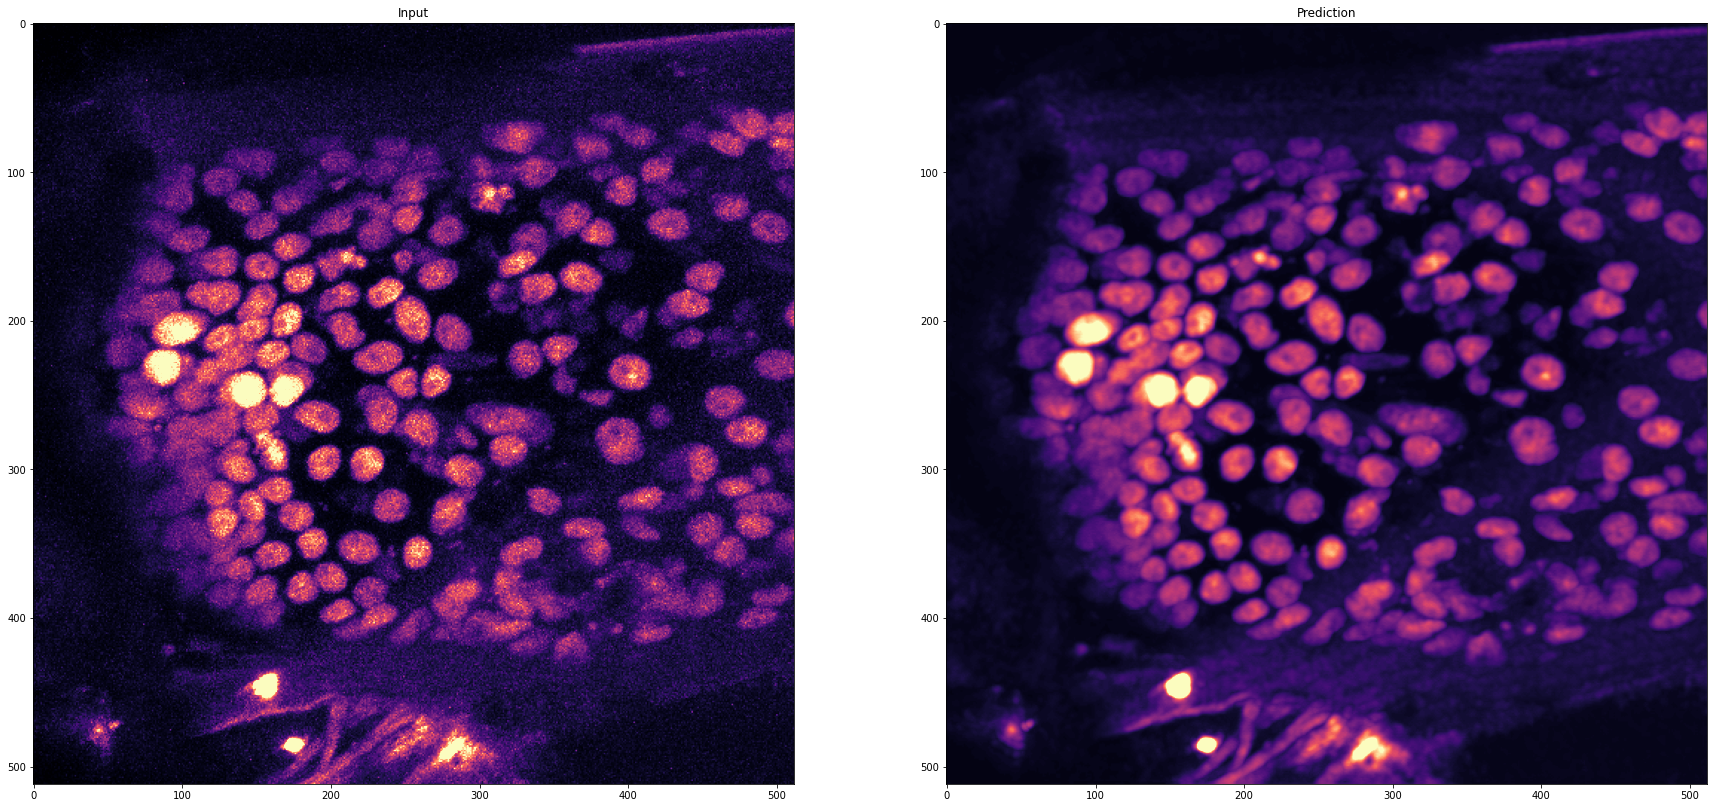

In [6]:
# Let's look at the results.
plt.figure(figsize=(30,30))

# We show the noisy input...
plt.subplot(1,2,1)
plt.imshow(np.max(img[0],axis=0),
           cmap='magma',
           vmin=np.percentile(img[0],0.1),
           vmax=np.percentile(img[0],99.9)
          )
plt.title('Input');

# and the result.
plt.subplot(1,2,2)
plt.imshow(np.max(result[0],axis=0), 
           cmap='magma',
           vmin=np.percentile(result[0],0.1),
           vmax=np.percentile(result[0],99.9)
          )
plt.title('Prediction');

## Save results

In [6]:
save_tiff_imagej_compatible('prediction.tif', pred, 'ZYX')